<a href="https://colab.research.google.com/github/vidhanmehta/Cat-vs-dog-prediction/blob/main/catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing data-set**

In [6]:
!kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:04<00:00, 236MB/s]
100% 812M/812M [00:04<00:00, 196MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [12]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1797.jpg', 'dog.4514.jpg', 'cat.4698.jpg', 'dog.1427.jpg', 'dog.11230.jpg', 'dog.7234.jpg', 'dog.7498.jpg', 'dog.9452.jpg', 'dog.6149.jpg', 'cat.8232.jpg', 'dog.7130.jpg', 'cat.4365.jpg', 'cat.7638.jpg', 'dog.3494.jpg', 'dog.11050.jpg', 'cat.7432.jpg', 'dog.9971.jpg', 'cat.8989.jpg', 'cat.777.jpg', 'dog.1448.jpg', 'dog.49.jpg', 'cat.1395.jpg', 'dog.5769.jpg', 'cat.12368.jpg', 'dog.2546.jpg', 'cat.6601.jpg', 'cat.4572.jpg', 'dog.5611.jpg', 'cat.7725.jpg', 'dog.11656.jpg', 'dog.4279.jpg', 'dog.12165.jpg', 'cat.850.jpg', 'cat.7528.jpg', 'dog.11147.jpg', 'dog.2378.jpg', 'cat.11021.jpg', 'cat.545.jpg', 'cat.10259.jpg', 'dog.1220.jpg', 'cat.11678.jpg', 'cat.10198.jpg', 'dog.6773.jpg', 'cat.8043.jpg', 'dog.38.jpg', 'dog.4039.jpg', 'cat.8311.jpg', 'dog.218.jpg', 'dog.5758.jpg', 'cat.3705.jpg', 'cat.7371.jpg', 'cat.11094.jpg', 'dog.1763.jpg', 'cat.3728.jpg', 'cat.10068.jpg', 'cat.1424.jpg', 'cat.2183.jpg', 'cat.11208.jpg', 'dog.300.jpg', 'dog.5090.jpg', 'cat.9834.jpg', 'dog.4852.jpg', 'do

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**Displaying Dogs Images**

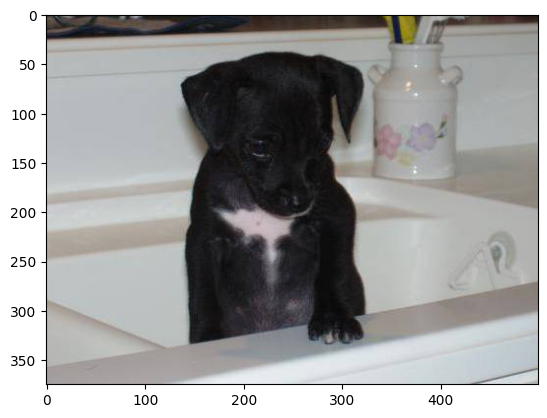

In [14]:

img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

**Displaying Cat Images**

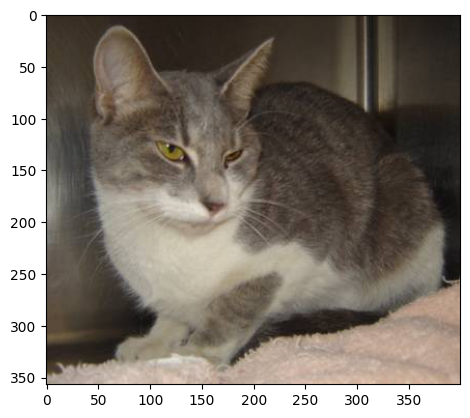

In [15]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [16]:
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])



cat
dog
cat
dog
dog


In [17]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1
print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


# since the dimention of all the images are varing so,
 **resizing all images to same size**

In [18]:
os.mkdir('/content/image resized')

In [19]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

**displaying the re-size of images**

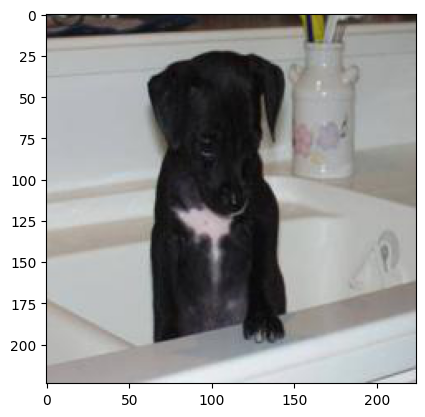

In [20]:

img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

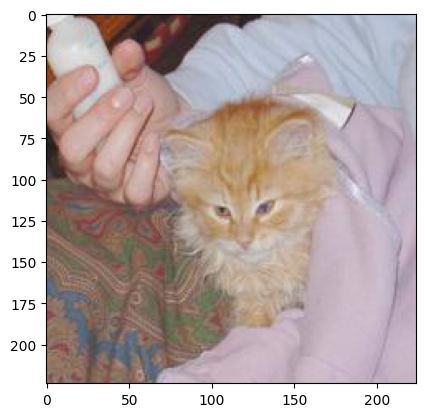

In [23]:
img = mpimg.imread('/content/image resized/cat.4507.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating lables**
# cat-0
#dog-1

In [24]:
filenames = os.listdir('/content/image resized/')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [25]:
print(filenames[0:5])
print(len(filenames))

['cat.1797.jpg', 'dog.4514.jpg', 'cat.4698.jpg', 'dog.1427.jpg', 'dog.11230.jpg']
2000


In [26]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 1]
2000


**counting the images of dogs and cats out of 2000 images**

In [28]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


**converting the re=sized images into numpy array**

In [29]:
import cv2
import glob

In [30]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [31]:
print(dog_cat_images)

[[[[ 19  25  30]
   [ 22  26  31]
   [ 25  25  31]
   ...
   [ 76  95 102]
   [ 93 112 119]
   [ 92 111 118]]

  [[ 17  23  28]
   [ 20  24  29]
   [ 23  23  29]
   ...
   [ 65  84  91]
   [ 81 100 107]
   [ 88 107 114]]

  [[ 14  20  25]
   [ 17  21  26]
   [ 20  20  26]
   ...
   [ 68  87  94]
   [ 79  98 103]
   [ 88 107 112]]

  ...

  [[ 29  37  50]
   [ 45  53  66]
   [ 60  69  82]
   ...
   [ 76  87  95]
   [ 76  87  95]
   [ 76  87  95]]

  [[ 39  47  60]
   [ 47  55  68]
   [ 56  65  78]
   ...
   [ 75  86  94]
   [ 75  86  94]
   [ 75  86  94]]

  [[ 57  65  78]
   [ 46  54  67]
   [ 56  65  78]
   ...
   [ 77  88  96]
   [ 77  88  96]
   [ 77  88  96]]]


 [[[ 46  45  47]
   [ 55  54  56]
   [ 61  63  64]
   ...
   [ 52  56  57]
   [ 46  50  51]
   [ 36  40  41]]

  [[ 48  47  49]
   [ 53  52  54]
   [ 54  56  57]
   ...
   [ 51  55  56]
   [ 46  50  51]
   [ 38  42  43]]

  [[ 52  54  55]
   [ 51  53  54]
   [ 49  51  52]
   ...
   [ 50  54  55]
   [ 47  51  52]
   [ 41  45

In [32]:
type(dog_cat_images)

numpy.ndarray

In [33]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [34]:
X = dog_cat_images
Y = np.asarray(labels)

# Test and Train split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


*which means        
  training Images:1600              
  test images: 400*

**scaling the colour**

In [37]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
print(X_train_scaled)

[[[[0.54901961 0.60392157 0.76862745]
   [0.40392157 0.45882353 0.62352941]
   [0.42745098 0.47843137 0.65098039]
   ...
   [0.4        0.44313725 0.67058824]
   [0.42352941 0.46666667 0.69411765]
   [0.44705882 0.49019608 0.71764706]]

  [[0.49411765 0.54509804 0.71764706]
   [0.34901961 0.4        0.57254902]
   [0.36470588 0.41568627 0.58823529]
   ...
   [0.31372549 0.35686275 0.58431373]
   [0.31764706 0.36078431 0.58823529]
   [0.32156863 0.36470588 0.59215686]]

  [[0.49411765 0.53333333 0.71764706]
   [0.3372549  0.37647059 0.56078431]
   [0.34509804 0.38431373 0.56862745]
   ...
   [0.32156863 0.36470588 0.6       ]
   [0.30588235 0.34901961 0.58431373]
   [0.29803922 0.34117647 0.57647059]]

  ...

  [[0.43921569 0.53333333 0.55686275]
   [0.30980392 0.40392157 0.42745098]
   [0.39215686 0.48627451 0.50980392]
   ...
   [0.20784314 0.34509804 0.26666667]
   [0.21176471 0.34901961 0.27058824]
   [0.2        0.3372549  0.25882353]]

  [[0.43137255 0.53333333 0.56078431]
   [0.2

**Building the Neural Network**

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

In [40]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [41]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [42]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 0.2051 - acc: 0.9206
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0703 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0521 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 57s 1s/step - loss: 0.0408 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0369 - acc: 0.9906


In [44]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0615 - acc: 0.9800
Test Loss = 0.06154735013842583
Test Accuracy = 0.9800000190734863


# Predictive System

Path of the image to be predicted: /dog.jpeg


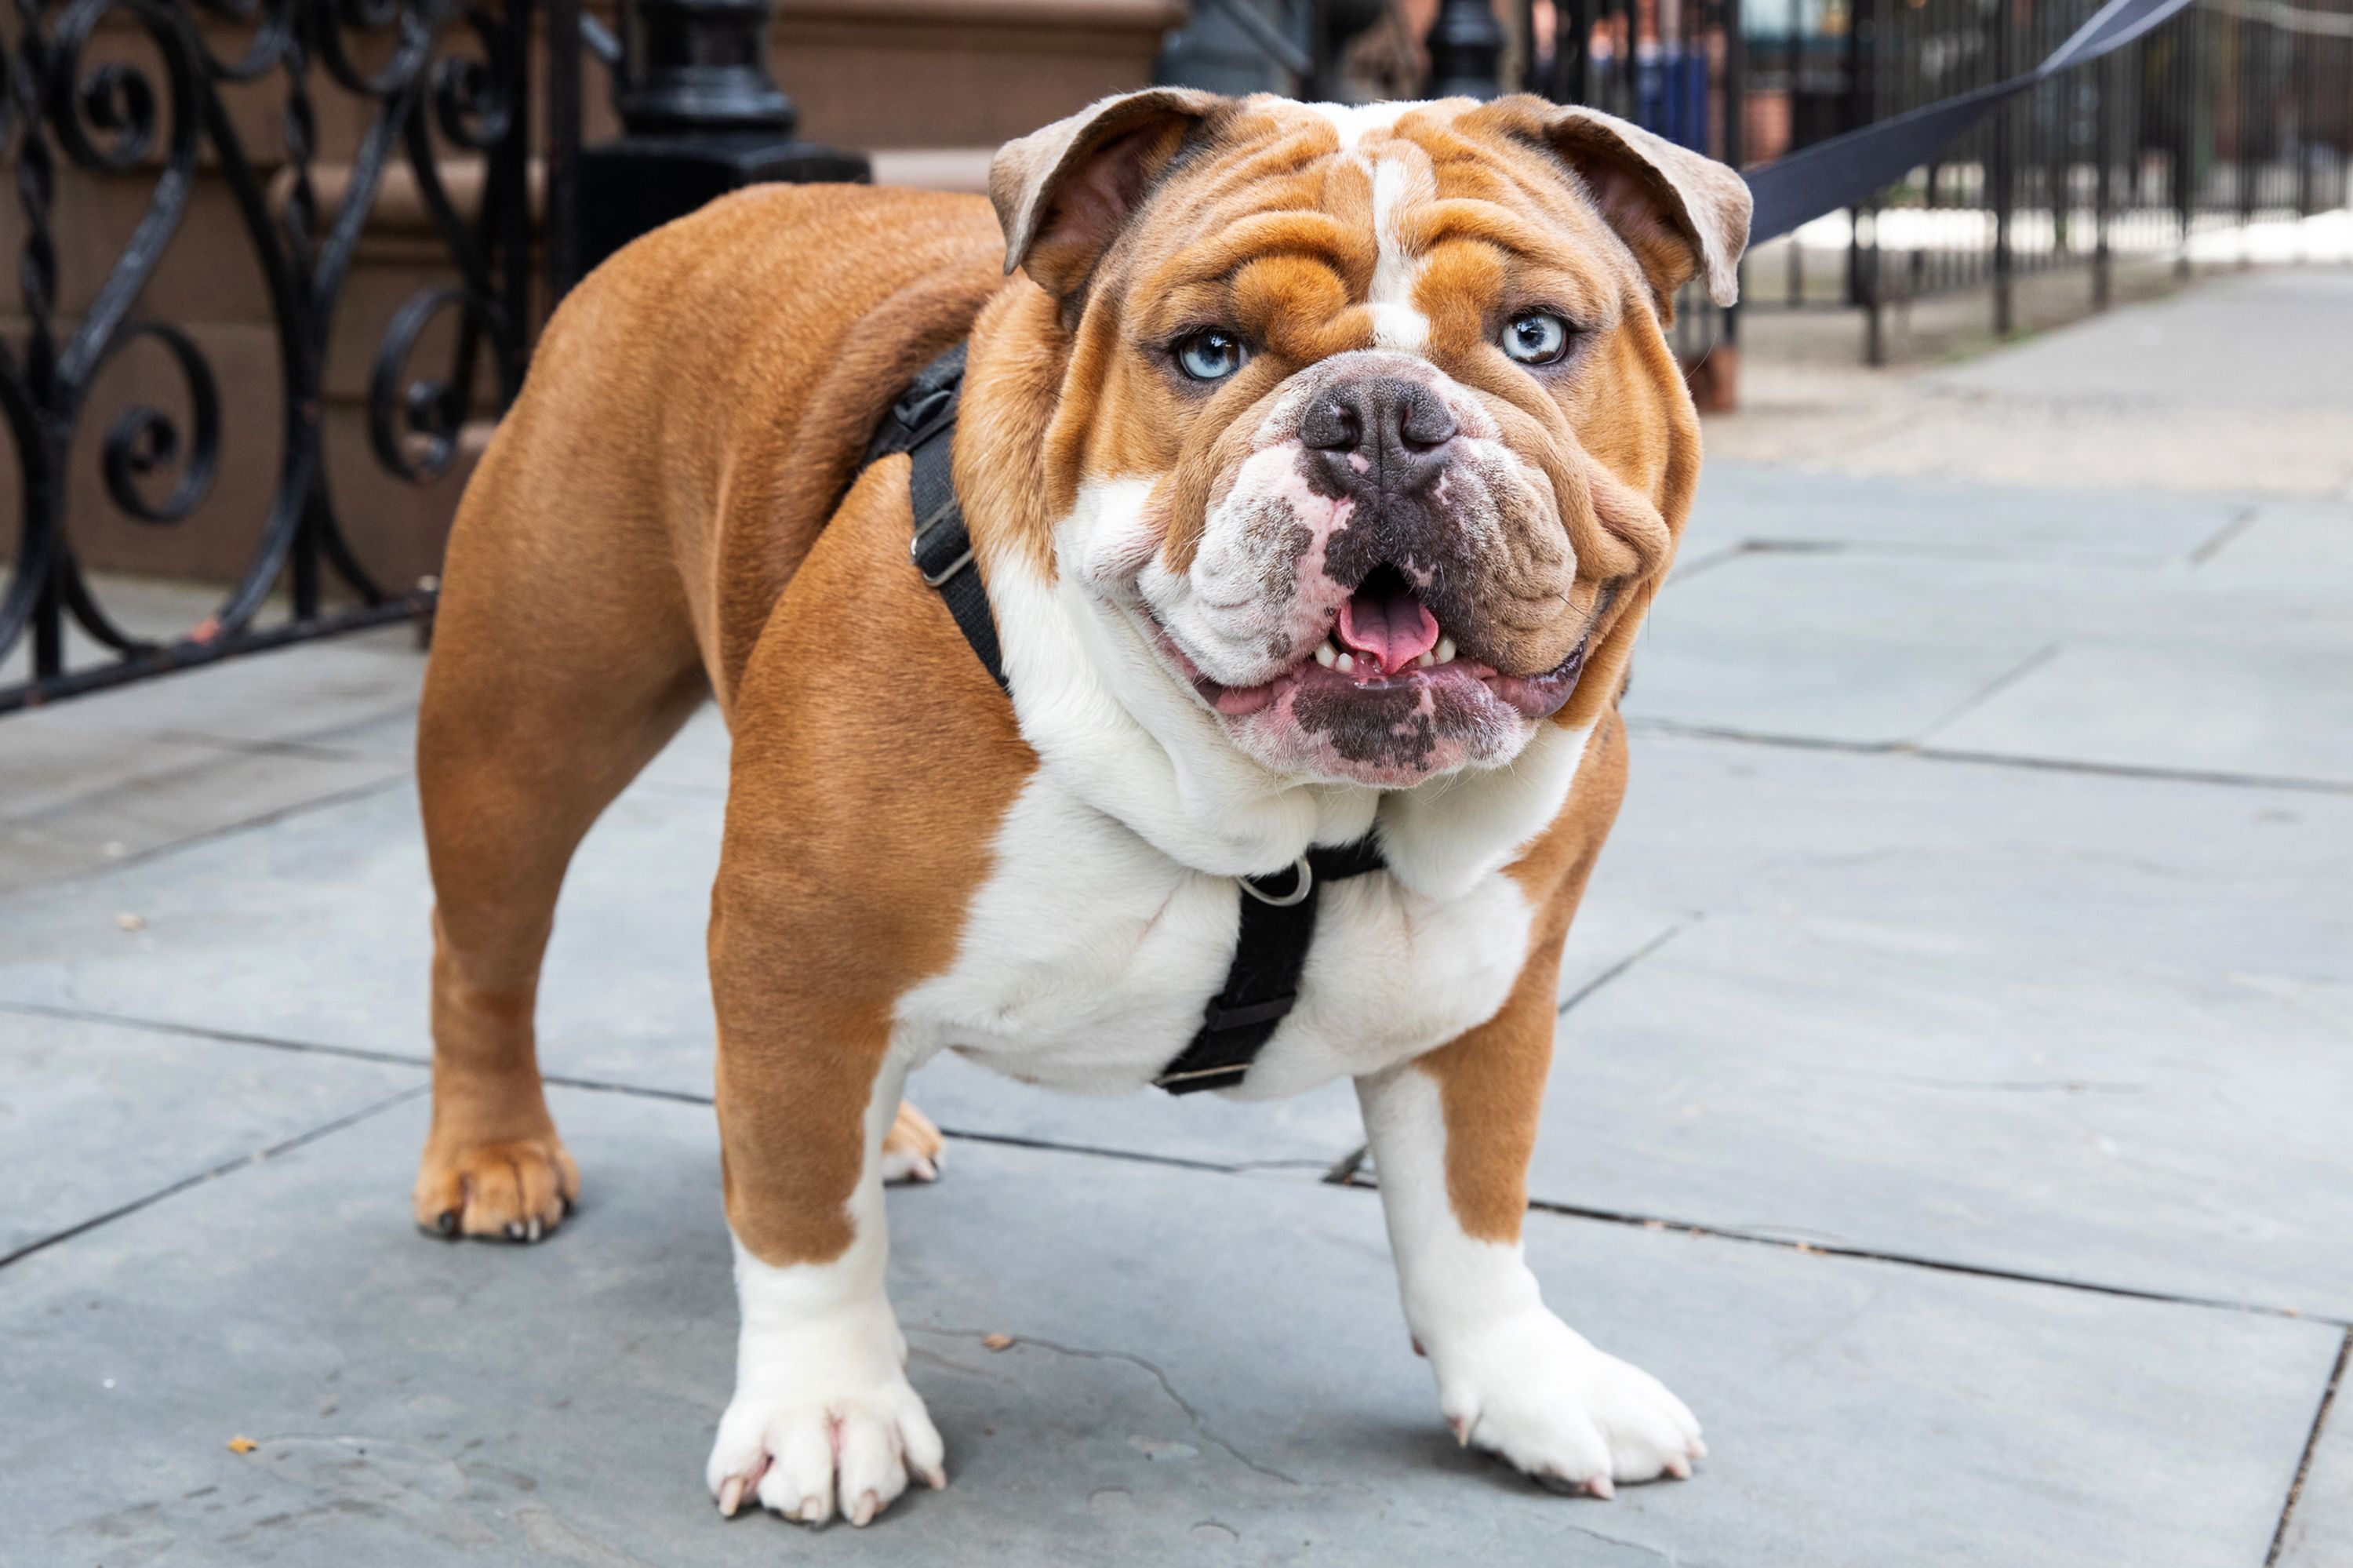

1/1 [==============================] - 1s 916ms/step
[[-1.9312874  1.7373791]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /cat.jpeg


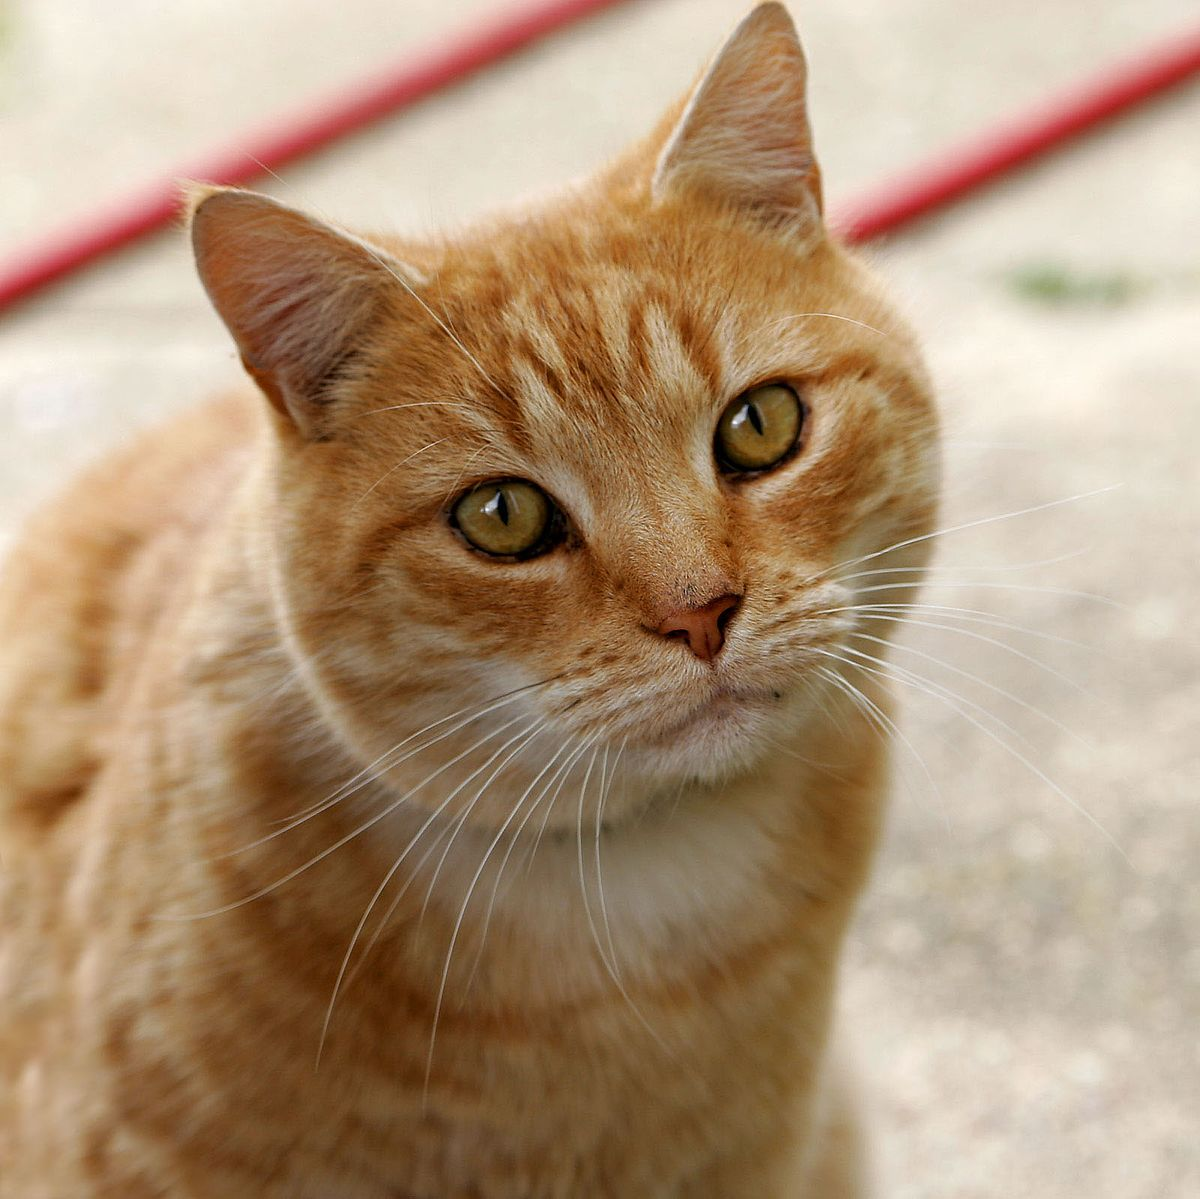

1/1 [==============================] - 0s 145ms/step
[[ 4.1292477 -6.179188 ]]
0
The image represents a Cat


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')